In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
import dlib

In [3]:
X = pd.read_csv("dados/train_images.csv", header=None)
y = pd.read_csv("dados/train_labels.csv")["Volcano?"]
X_test = pd.read_csv("dados/test_images.csv", header=None)
y_test = pd.read_csv("dados/test_labels.csv")["Volcano?"]

In [4]:
print(X.shape)
print(y.shape)

print(X_test.shape)
print(y_test.shape)

(7000, 12100)
(7000,)
(2734, 12100)
(2734,)


In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.fit_transform(X_test)

In [6]:
pca = PCA(n_components=2000)
pca.fit(X)
X_train_pca = pca.transform(X)
X_test_pca = pca.transform(X_test)

In [8]:
import dlib
def get_score(p_gamma):
    svm = SVC(gamma=p_gamma, kernel='rbf',C=2.0)
    svm.fit(X_train_pca, y)
    pred = svm.predict(X_test_pca)
    return accuracy_score(y_test, pred)
gamma, score = dlib.find_max_global(get_score, [1e-10],[1], 20)
print('gamma = {}, score = {}'.format(gamma, score))

gamma = [0.00027250815475358676], score = 0.9451353328456474


In [14]:
svm = SVC(gamma=2.7*10e-5, kernel='rbf',C=2.0)
svm.fit(X_train_pca, y)

SVC(C=2.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.00027000000000000006,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [15]:
pred = svm.predict(X_test_pca)
print(classification_report(y_test, pred))
print("Score: {}".format(accuracy_score(y_test, pred)))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97      2300
          1       0.91      0.73      0.81       434

avg / total       0.94      0.95      0.94      2734

Score: 0.9451353328456474


In [20]:
svm = SVC(gamma=2.7*10e-5, kernel='rbf',C=2.0,probability=True)
svm.fit(X_train_pca, y)

SVC(C=2.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.00027000000000000006,
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [23]:
from sklearn import metrics
probs = svm.predict_proba(X_test_pca)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, probs)
auc_score = metrics.auc(fpr,tpr)

In [27]:
print(probs)
print(pred)

[0.67671362 0.01755783 0.99999502 ... 0.66473819 0.13501397 0.7869167 ]
[0 0 1 ... 0 0 1]


In [24]:
auc_score

0.9619364856742136

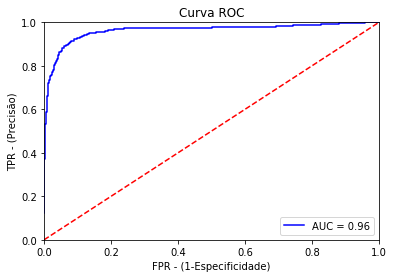

In [34]:
import matplotlib.pyplot as plt
plt.title('Curva ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc_score)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPR - (Precisão)')
plt.xlabel('FPR - (1-Especificidade)')
plt.savefig('roc.png')
plt.show()